# Data analysis

## Load data

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from qiskit_experiments.framework import (
    ExperimentData,
    ExperimentDecoder,
    ExperimentEncoder,
)
from qiskit_research.mzm_generation import KitaevHamiltonianAnalysis

In [2]:
# use this cell to retrieve data from the Qiskit Experiments database service

# from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub="ibm-q-internal", group="deployed", project="default")

# db_experiment_id = '960a6482-1a98-4509-96d3-2c46ac35b733'

# # retrieve data
# data = ExperimentData.load(db_experiment_id, provider.service("experiment"))

# # save data to local disk
# params = data.metadata["params"]
# filename = f"data/{params.filename}.json"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# with open(filename, "w") as f:
#     json.dump(data, f, cls=ExperimentEncoder)

# print(params.filename)

In [2]:
data_raw = []

In [2]:
# load data from local disk

filenames = [
    "2022-06-07T14:21:27.732642_ibmq_guadalupe_n6",
    "2022-06-08T13:48:47.226726_ibmq_guadalupe_n8",
    "2022-06-08T09:03:02.452130_ibmq_guadalupe_n10",
    "2022-06-08T19:28:08.685402_ibmq_guadalupe_n12",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""
# data = []
data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [1697]:
filename = "2022-07-07T10:37:36.116116_ibmq_guadalupe_n3"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [99]:
data_raw_staggered = []
data_raw.pop()

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 59795e9e-272f-4900-9bce-869b95a6154a>

In [1369]:
filename = "2022-06-30T09:17:00.200991_ibmq_guadalupe_n12"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw_staggered.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{'timestamp': '2022-06-30T09:17:00.200991', 'backend_name': 'ibmq_guadalupe', 'qubits': [3, 2, 1, 4, 7, 10, 12, 13, 14, 11, 8, 5], 'n_modes': 12, 'tunneling_values': [-1.0], 'superconducting_values': [1.0], 'chemical_potential_values': [0.0, 0.75, 1.5, 2.25, 3.0], 'occupied_orbitals_list': [[], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], 'dynamical_decoupling_sequences': [None, 'X2pm', 'XY4pm', 'XY8pm'], 'num_dd_passes': 1, 'uhrig_spacing': False, 'concat_layers': 1, 'pulse_scaling': False, 'num_twirled_circuits': 0, 'seed': 11364, 'basedir': Non

In [1315]:
filename = "2022-06-30T21:14:31.416293_aer_simulator_n11"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/aer_simulator", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw_noise.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [1601]:
data_raw_noise_idle = []

In [1608]:
filename = "2022-07-05T14:30:23.349644_aer_simulator_n5"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/aer_simulator", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw_noise_idle.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{'timestamp': '2022-07-05T14:30:23.349644', 'backend_name': 'aer_simulator', 'qubits': [13, 14, 11, 8, 5], 'n_modes': 5, 'tunneling_values': [-1.0], 'superconducting_values': [1.0], 'chemical_potential_values': [0.0, 0.75, 1.5, 2.25, 3.0], 'occupied_orbitals_list': [[], [0, 1, 2, 3, 4], [0], [1, 2, 3, 4], [1], [0, 2, 3, 4]], 'dynamical_decoupling_sequences': None, 'num_dd_passes': 1, 'uhrig_spacing': False, 'concat_layers': 1, 'pulse_scaling': False, 'num_twirled_circuits': 0, 'seed': 11364, 'basedir': None}], kwargs={'provider': {'class': <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'>, 'settings': {}, 'versi

In [1620]:
data_raw_greedy = []
data_list_greedy = []

In [1622]:
filename = "2022-07-05T13:35:50.721021_ibmq_guadalupe_n6"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw_greedy.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [1128]:
data_raw_noise = []
data_list_noise = []

In [1603]:
data_list_noise_idle = []

In [1129]:
len(data_list_noise)

0

In [1401]:
data_list

[<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 96d345b0-62eb-41eb-bda7-00465687b4ae>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: e83c9567-614b-4e5e-8585-c57c703f372f>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: a755741d-6518-4d46-aada-a12379b877e6>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: be6d8332-1938-4a98-8f01-bb01aecbb0d5>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 6b9572e3-d29d-42a1-8532-70e086d250a1>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 2178a135-b91e-420f-afb6-e48223671325>,
 <ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: d192a9d2-8

In [1368]:
len(data_list_staggered)

9

In [1370]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw_staggered[-1], replace_results=True)
data.block_for_results()
data_list_staggered.append(data)

In [1316]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw_noise[-1], replace_results=True)
data.block_for_results()
data_list_noise.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [1609]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw_noise_idle[-1], replace_results=True)
data.block_for_results()
data_list_noise_idle.append(data)

In [1635]:
len(data_raw_greedy)

1

In [1623]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw_greedy[-1], replace_results=True)
data.block_for_results()
data_list_greedy.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py:697: RuntimeWarning: overflow encountered in matmul
  error = cast(float, np.linalg.norm(mat @ mat - mat))
/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py:697: RuntimeWarning: invalid value encountered in matmul
  error = cast(float, np.linalg.norm(mat @ mat - mat))
/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py:696: RuntimeWarning: overflow encountered in matmul
  mat = mat @ mat @ (three - 2 * mat)
/Users/georgezhou/D

In [1038]:
len(data_list_noise)

5

In [10]:
data_list_staggered = []

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.POST_PROCESSING, experiment_id: be6d8332-1938-4a98-8f01-bb01aecbb0d5>

In [1314]:
data_list_staggered.pop()

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: fd8ed34f-2065-4d29-a63a-c94dbbeeae8f>

In [3]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
i=0
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)
    print(i)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


0
0
0
0
CPU times: user 13h 5min 33s, sys: 5min 30s, total: 13h 11min 3s
Wall time: 5h 45min 34s


In [958]:
len(data_list)

10

In [14]:
data_raw.pop()

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 5563627d-cf86-483a-a137-f34cab4eb04e>

In [1701]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw[-1], replace_results=True)
data.block_for_results()
data_list.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/analysis.py:765: RuntimeWarning: divide by zero encountered in true_divide
  error_percentage = np.divide(error, exact)


In [23]:
import pickle

pickle.dump(data_list, open('guadalupe.p', 'wb'))

In [5]:
import pickle

data_list = pickle.load(open('guadalupe.p', 'rb'))

In [947]:
data_list_staggered.pop()

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 8d72c222-5155-4e64-8f93-edc41c53104d>

In [1702]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Guadalupe_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

# print(params)

In [1704]:
energy_error

[{None: {'raw': (array([1.957     , 2.21191686, 2.85865972, 3.55932563, 4.32718188]),
    array([0.00855252, 0.00940871, 0.01160147, 0.01411665, 0.01684451]),
    array([0.65233333, 0.57321695, 0.56985911, 0.56276905, 0.56149042])),
   'mem': (array([1.69515652, 1.94625115, 2.57216152, 3.2262668 , 3.93671726]),
    array([0.01742725, 0.01924996, 0.0239211 , 0.02914437, 0.03472538]),
    array([0.56505217, 0.50436984, 0.51274717, 0.51010873, 0.51082415])),
   'ps': (array([1.88796229, 2.07202602, 2.59703875, 3.09463801, 3.67373192]),
    array([0.02548549, 0.02837333, 0.03442228, 0.04130178, 0.04846069]),
    array([0.62932076, 0.53696432, 0.51770632, 0.48929675, 0.47669946])),
   'pur': (array([0.23688066, 0.28047094, 0.57314219, 0.72057997, 0.9688752 ]),
    array([0.02548549, 0.02837333, 0.03442228, 0.04130178, 0.04846069]),
    array([0.07896022, 0.07268388, 0.11425295, 0.11393172, 0.12572019]))},
  'X2pm': {'raw': (array([1.97056667, 2.14765019, 2.57136805, 2.95962563, 3.49466521])

In [1696]:
print(energy_error[-1][None]['raw'][0])
print(energy_error[-1]['X2pm']['raw'][0])
print(energy_error[-1]['XY4pm']['raw'][0])
print(energy_error[-1]['XY8pm']['raw'][0])
print("")
print(energy_error[-2][None]['raw'][0])


[ 5.33211667  5.82932103  7.00916805  8.65535896 10.48076521]
[ 5.3424      5.88629603  7.17724305  8.94897979 10.97134855]
[ 5.32461667  5.85322519  7.14909305  8.93686729 10.92386521]
[ 5.37433333  5.90015436  7.18600972  8.96795479 10.94433188]

[1.58828333 1.89223769 2.48299305 3.18827146 3.88423188]


In [1688]:
np.divide(np.asarray(energy_error[-1][None]['raw'][0]), np.asarray(energy_error[-2][None]['raw'][0]))

array([3.3571571 , 3.08064946, 2.82287059, 2.71474969, 2.69828515])

In [1689]:
print(energy_error[-1][None]['raw'][2])

[1.77737222 1.5106651  1.3972416  1.3685087  1.3599727 ]


In [1678]:
fidelity_witness_avg[-2]

{None: {'raw': (array([-0.22785   , -0.30323462, -0.35886051, -0.4155063 , -0.42226103]),
   array([0.0046386 , 0.0047503 , 0.00488815, 0.00488704, 0.00480065])),
  'mem': (array([-0.12901493, -0.20902906, -0.26982368, -0.33074151, -0.33865881]),
   array([0.00680613, 0.00699294, 0.00722349, 0.00722395, 0.00708175])),
  'ps': (array([-0.19715524, -0.20821575, -0.21015809, -0.22343419, -0.18202597]),
   array([0.00998404, 0.00993237, 0.01006831, 0.01001752, 0.00964707])),
  'pur': (array([0.8918812 , 0.89417793, 0.84440247, 0.80267694, 0.8083351 ]),
   array([0.00998404, 0.00993237, 0.01006831, 0.01001752, 0.00964707]))}}

In [1673]:
energy_greedy[-1][None]

{'raw': {(): (array([-2.147   , -0.92645 ,  0.3615  ,  1.825125,  3.3157  ]),
   array([0.01539643, 0.01651652, 0.01982867, 0.02379545, 0.02880818])),
  (0,
   1,
   2,
   3,
   4,
   5): (array([-4.3104  , -3.298075, -2.34995 , -1.419025, -0.6246  ]), array([0.01511349, 0.01655544, 0.02025419, 0.02497968, 0.03050455])),
  (0,): (array([-2.2369  , -1.06135 ,  0.2438  ,  1.672275,  2.9946  ]),
   array([0.01535424, 0.01658307, 0.02008428, 0.02444644, 0.02971963])),
  (1, 2, 3, 4, 5): (array([-4.0998 , -3.1376 , -2.133  , -1.06955, -0.0927 ]),
   array([0.01536298, 0.01673929, 0.0207186 , 0.02522018, 0.03067436])),
  (1,): (array([-2.3896  , -1.41295 , -0.0485  ,  1.504475,  3.0753  ]),
   array([0.01503332, 0.01643196, 0.01982297, 0.02408919, 0.028816  ])),
  (0, 2, 3, 4, 5): (array([-4.0896, -2.7241, -1.9556, -1.0923, -0.2318]),
   array([0.015576  , 0.01746438, 0.02090798, 0.0249551 , 0.03078614]))},
 'mem': {(): (array([-2.25211851, -0.9442878 ,  0.41101216,  1.97570409,  3.57025129]

In [1371]:
params_staggered = []
fidelity_witness_avg_staggered = []
energy_exact_staggered = []
energy_staggered = []
energy_error_staggered = []
bdg_energy_exact_staggered = []
bdg_energy_staggered = []
edge_correlation_exact_staggered = []
edge_correlation_staggered = []
number_exact_staggered = []
number_staggered = []
parity_exact_staggered = []
parity_staggered = []
site_correlation_exact_staggered = []
site_correlation_staggered = []
for data in data_list_staggered:
    params_staggered.append(data.metadata["params"])
    
# load results
    fidelity_witness_avg_staggered.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact_staggered.append(data.analysis_results("energy_exact").value)
    energy_staggered.append(data.analysis_results("energy").value)
    energy_error_staggered.append(data.analysis_results("energy_error").value)
    bdg_energy_exact_staggered.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy_staggered.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact_staggered.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation_staggered.append(data.analysis_results("edge_correlation").value)
    number_exact_staggered.append(data.analysis_results("number_exact").value)
    number_staggered.append(data.analysis_results("number").value)
    parity_exact_staggered.append(data.analysis_results("parity_exact").value)
    parity_staggered.append(data.analysis_results("parity").value)
    site_correlation_exact_staggered.append(data.analysis_results("site_correlation_exact").value)
    site_correlation_staggered.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Guadalupe_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

# print(params)

In [1319]:
params_noise = []
fidelity_witness_avg_noise = []
energy_exact_noise = []
energy_noise = []
energy_error_noise = []
bdg_energy_exact_noise = []
bdg_energy_noise = []
edge_correlation_exact_noise = []
edge_correlation_noise = []
number_exact_noise = []
number_noise = []
parity_exact_noise = []
parity_noise = []
site_correlation_exact_noise = []
site_correlation_noise = []
for data in data_list_noise:
    params_noise.append(data.metadata["params"])

# load results
    fidelity_witness_avg_noise.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact_noise.append(data.analysis_results("energy_exact").value)
    energy_noise.append(data.analysis_results("energy").value)
    energy_error_noise.append(data.analysis_results("energy_error").value)
    bdg_energy_exact_noise.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy_noise.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact_noise.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation_noise.append(data.analysis_results("edge_correlation").value)
    number_exact_noise.append(data.analysis_results("number_exact").value)
    number_noise.append(data.analysis_results("number").value)
    parity_exact_noise.append(data.analysis_results("parity_exact").value)
    parity_noise.append(data.analysis_results("parity").value)
    site_correlation_exact_noise.append(data.analysis_results("site_correlation_exact").value)
    site_correlation_noise.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/noise_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

# print(params)

In [1610]:
params_noise_idle = []
fidelity_witness_avg_noise_idle = []
energy_exact_noise_idle = []
energy_noise_idle = []
energy_error_noise_idle = []
bdg_energy_exact_noise_idle = []
bdg_energy_noise_idle = []
edge_correlation_exact_noise_idle = []
edge_correlation_noise_idle = []
number_exact_noise_idle = []
number_noise_idle = []
parity_exact_noise_idle = []
parity_noise_idle = []
site_correlation_exact_noise_idle = []
site_correlation_noise_idle = []
for data in data_list_noise_idle:
    params_noise_idle.append(data.metadata["params"])

# load results
    fidelity_witness_avg_noise_idle.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact_noise_idle.append(data.analysis_results("energy_exact").value)
    energy_noise_idle.append(data.analysis_results("energy").value)
    energy_error_noise_idle.append(data.analysis_results("energy_error").value)
    bdg_energy_exact_noise_idle.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy_noise_idle.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact_noise_idle.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation_noise_idle.append(data.analysis_results("edge_correlation").value)
    number_exact_noise_idle.append(data.analysis_results("number_exact").value)
    number_noise_idle.append(data.analysis_results("number").value)
    parity_exact_noise_idle.append(data.analysis_results("parity_exact").value)
    parity_noise_idle.append(data.analysis_results("parity").value)
    site_correlation_exact_noise_idle.append(data.analysis_results("site_correlation_exact").value)
    site_correlation_noise_idle.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/noise_idle_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

# print(params)

In [1624]:
params_greedy = []
fidelity_witness_avg_greedy = []
energy_exact_greedy = []
energy_greedy = []
energy_error_greedy = []
bdg_energy_exact_greedy = []
bdg_energy_greedy = []
edge_correlation_exact_greedy = []
edge_correlation_greedy = []
number_exact_greedy = []
number_greedy = []
parity_exact_greedy = []
parity_greedy = []
site_correlation_exact_greedy = []
site_correlation_greedy = []
for data in data_list_greedy:
    params_greedy.append(data.metadata["params"])

# load results
    fidelity_witness_avg_greedy.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact_greedy.append(data.analysis_results("energy_exact").value)
    energy_greedy.append(data.analysis_results("energy").value)
    energy_error_greedy.append(data.analysis_results("energy_error").value)
    bdg_energy_exact_greedy.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy_greedy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact_greedy.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation_greedy.append(data.analysis_results("edge_correlation").value)
    number_exact_greedy.append(data.analysis_results("number_exact").value)
    number_greedy.append(data.analysis_results("number").value)
    parity_exact_greedy.append(data.analysis_results("parity_exact").value)
    parity_greedy.append(data.analysis_results("parity").value)
    site_correlation_exact_greedy.append(data.analysis_results("site_correlation_exact").value)
    site_correlation_greedy.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/greedy_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

# print(params)

In [1656]:
len(energy_error_greedy)

1

In [1015]:
print(len(data_list_noise))

4


In [1386]:
print(energy_error_staggered[-1][None])

{'raw': (array([ 9.88545   , 12.18910247, 13.93286391, 16.64680494, 20.09651838]), array([0.0113766 , 0.00957375, 0.01157059, 0.01407805, 0.01697686]), array([1.09838333, 1.19465249, 1.12956167, 1.09634611, 1.09086254])), 'mem': (array([ 9.87308129, 12.26212842, 14.00957182, 16.72265723, 20.18660759]), array([0.03022406, 0.02104539, 0.02575145, 0.0309883 , 0.03712778]), array([1.09700903, 1.20180976, 1.13578052, 1.10134169, 1.09575268])), 'ps': (array([ 9.90620193, 12.22125606, 14.02586001, 16.7025232 , 20.13357118]), array([0.04434399, 0.03323881, 0.03959147, 0.0478255 , 0.05723889]), array([1.1006891 , 1.19780386, 1.13710103, 1.10001567, 1.0928738 ])), 'pur': (array([8.92634647e+168, 2.72398362e+169, 1.98669518e+167, 6.52341480e+166,
       4.40126291e+167]), array([0.04434399, 0.03323881, 0.03959147, 0.0478255 , 0.05723889]), array([9.91816275e+167, 2.66977313e+168, 1.61064857e+166, 4.29627215e+165,
       2.38905701e+166]))}


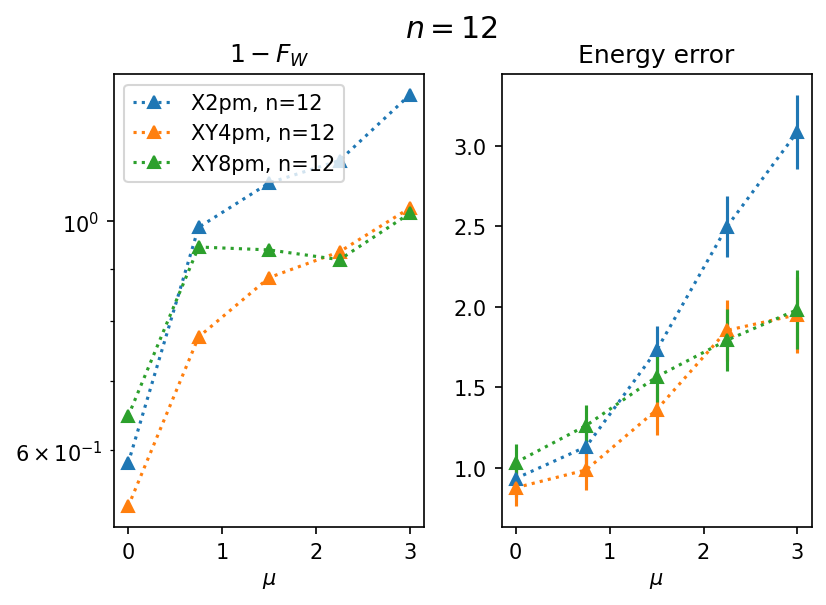

In [1476]:
dd_sequences = ['X2pm', 'XY4pm', 'XY8pm']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)
plt.rc('font', size=10)

i=3

# values, stddev = fidelity_witness_avg[i][None]["pur"]
# ax1.errorbar(
#     params[i].chemical_potential_values,
#     1 - values,
#     # yerr=2 * stddev,
#     fmt="s:",
#     label=f"No DD, n={params[i].n_modes}",
# )

for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg[i][dd_sequence]["pur"]
    ax1.errorbar(
        params[i].chemical_potential_values,
        1 - values,
        # yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

# values, stddev, percent_error = energy_error[i][None]["pur"]
# ax2.errorbar(
#     params[i].chemical_potential_values,
#     values,
#     # percent_error * 100,
#     # yerr=2 * stddev,
#     fmt="s:",
#     label=f"No DD, n={params[i].n_modes}",
# )

ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
# ax1.set_ylim(1e-3, 1e-2)

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error[i][dd_sequence]["pur"]
    ax2.errorbar(
        params[i].chemical_potential_values,
        values,
        # percent_error * 100,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
# ax2.set_yscale("log")
# ax2.set_ylim(0, 10)
ax1.legend(loc="upper left")
fig.suptitle(
    rf"$n = {params[i].n_modes}$",
    size="x-large",
    # y=0.02
)

data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params[i].n_modes}.{filetype}")
plt.show()

In [1477]:
energy_error[3]['X2pm']['pur']

(array([0.9332854 , 1.13098398, 1.7293131 , 2.49877872, 3.08912395]),
 array([0.05757741, 0.06247323, 0.07615052, 0.09600723, 0.1146824 ]),
 array([0.10369838, 0.11084761, 0.14019844, 0.1645677 , 0.16768126]))

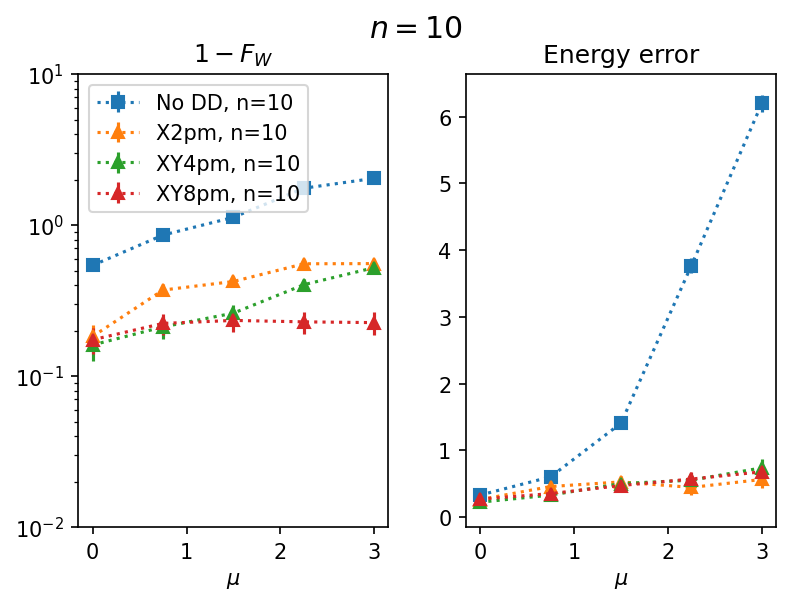

In [742]:
dd_sequences = ['X2pm', 'XY4pm', 'XY8pm']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

i=7

values, stddev = fidelity_witness_avg_staggered[i][None]["pur"]
ax1.errorbar(
    params_staggered[i].chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params_staggered[i].n_modes}",
)

for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg_staggered[i][dd_sequence]["pur"]
    ax1.errorbar(
        params_staggered[i].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params_staggered[i].n_modes}",
    )

values, stddev, percent_error = energy_error_staggered[i][None]["pur"]
ax2.errorbar(
    params[i].chemical_potential_values,
    values,
    # percent_error * 100,
    yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params_staggered[i].n_modes}",
)

ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
ax1.set_ylim(1e-2, 10)

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error_staggered[i][dd_sequence]["pur"]
    ax2.errorbar(
        params_staggered[i].chemical_potential_values,
        values,
        # percent_error * 100,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params_staggered[i].n_modes}",
    )

ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
# ax2.set_yscale("log")
# ax2.set_ylim(0, 10)
ax1.legend(loc="upper left")
fig.suptitle(
    rf"$n = {params_staggered[i].n_modes}$",
    size="x-large",
    # y=0.02
)

# data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params_staggered[i].n_modes}.{filetype}")
plt.show()

In [649]:
delay_times = {
    3: 29555232,
    4: 36547776,
    5: 60632032,
    6: 63100288,
    7: 89455520,
    8: 100155456,
    9: 133951968,
    10: 145424640,
    11: 183828640,
    12 : 194917312
}

delay_times_0 = {
    3 : 29727648,
    4 : 33258432,
    5 : 56667488,
    6 : 59521152,
    7 : 84585120,
    8 : 91839936,
    9 : 124423648,
    10 : 132403072,
    11 : 168473248,
    12 : 175727680
}

In [1378]:
bare = []
error_reduction_X2 = []
error_reduction_XY4 = []
error_reduction_XY8 = []
times = []
times_0 = []
cx_error = []
for param, energy_err in zip(params_staggered, energy_error_staggered):
    times.append(delay_times[param.n_modes])
    times_0.append(delay_times_0[param.n_modes])
    # cx_error.append(1 - (1 - 9.716e-1) ** cx_counts[param.n_modes])
    values_no_DD, _, percent_error_no_DD = energy_err[None]['raw']
    values_X2, _, percent_error_X2 = energy_err['X2pm']['raw']
    values_XY4, _, percent_error_XY4 = energy_err['XY4pm']['raw']
    values_XY8, _, percent_error_XY8 = energy_err['XY8pm']['raw']
    # bare.append(percent_error_no_DD)
    # error_reduction_X2.append(percent_error_X2)
    # error_reduction_XY4.append(percent_error_XY4)
    # error_reduction_XY8.append(percent_error_XY8)
    bare.append(values_no_DD)
    error_reduction_X2.append(values_X2)
    error_reduction_XY4.append(values_XY4)
    error_reduction_XY8.append(values_XY8)
times = np.asarray(times) * 1e-8
times_0 = np.asarray(times_0) * 1e-8
sorted_times = np.sort(times)
bare = np.asarray(bare).T
# cx_error = np.asarray(cx_error).T
error_reduction_X2 = np.asarray(error_reduction_X2).T
error_reduction_XY4 = np.asarray(error_reduction_XY4).T
error_reduction_XY8 = np.asarray(error_reduction_XY8).T

In [1444]:
error_reduction_X2_non_staggered = []
error_reduction_XY4_non_staggered = []
error_reduction_XY8_non_staggered = []
stddev_bare = []
stddev_x2_non_staggered = []
stddev_xy4_non_staggered = []
stddev_xy8_non_staggered = []
bare_non_staggered = []
times_non_staggered = []
for param, energy_err in zip(params, energy_error):
    times_non_staggered.append(delay_times[param.n_modes])
    values_no_DD, stddev_no_DD, percent_error_no_DD = energy_err[None]['raw']
    values_X2, stddev_x2, percent_error_X2 = energy_err['X2pm']['raw']
    values_XY4, stddev_xy4, percent_error_XY4 = energy_err['XY4pm']['raw']
    values_XY8, stddev_xy8, percent_error_XY8 = energy_err['XY8pm']['raw']
    # bare.append(percent_error_no_DD)
    # error_reduction_X2.append(percent_error_X2)
    # error_reduction_XY4.append(percent_error_XY4)
    # error_reduction_XY8.append(percent_error_XY8)
    bare_non_staggered.append(values_no_DD)
    error_reduction_X2_non_staggered.append(values_X2)
    error_reduction_XY4_non_staggered.append(values_XY4)
    error_reduction_XY8_non_staggered.append(values_XY8)
    stddev_bare.append(stddev_no_DD)
    stddev_x2_non_staggered.append(stddev_x2)
    stddev_xy4_non_staggered.append(stddev_xy4)
    stddev_xy8_non_staggered.append(stddev_xy8)
times_non_staggered = np.asarray(times_non_staggered) * 1e-8
# cx_error = np.asarray(cx_error).T
bare_non_staggered = np.asarray(bare_non_staggered).T
error_reduction_X2_non_staggered = np.asarray(error_reduction_X2_non_staggered).T
error_reduction_XY4_non_staggered = np.asarray(error_reduction_XY4_non_staggered).T
error_reduction_XY8_non_staggered = np.asarray(error_reduction_XY8_non_staggered).T
stddev_bare = np.asarray(stddev_bare).T
stddev_x2_non_staggered = np.asarray(stddev_x2_non_staggered).T
stddev_xy4_non_staggered = np.asarray(stddev_xy4_non_staggered).T
stddev_xy8_non_staggered = np.asarray(stddev_xy8_non_staggered).T

In [1638]:
error_reduction_X2_greedy = []
error_reduction_XY4_greedy = []
error_reduction_XY8_greedy = []
stddev_x2_greedy = []
stddev_xy4_greedy = []
stddev_xy8_greedy = []
times_greedy = []
for param, energy_err in zip(params_greedy, energy_error_greedy):
    times_greedy.append(delay_times[param.n_modes])
    values_no_DD, stddev_no_DD, percent_error_no_DD = energy_err[None]['raw']
    values_X2, stddev_x2, percent_error_X2 = energy_err['X2pm']['raw']
    values_XY4, stddev_xy4, percent_error_XY4 = energy_err['XY4pm']['raw']
    values_XY8, stddev_xy8, percent_error_XY8 = energy_err['XY8pm']['raw']
    # bare.append(percent_error_no_DD)
    # error_reduction_X2.append(percent_error_X2)
    # error_reduction_XY4.append(percent_error_XY4)
    # error_reduction_XY8.append(percent_error_XY8)
    error_reduction_X2_greedy.append(values_X2)
    error_reduction_XY4_greedy.append(values_XY4)
    error_reduction_XY8_greedy.append(values_XY8)
    stddev_x2_greedy.append(stddev_x2)
    stddev_xy4_greedy.append(stddev_xy4)
    stddev_xy8_greedy.append(stddev_xy8)
times_greedy = np.asarray(times_greedy) * 1e-8
# cx_error = np.asarray(cx_error).T
error_reduction_X2_greedy = np.asarray(error_reduction_X2_greedy).T
error_reduction_XY4_greedy = np.asarray(error_reduction_XY4_greedy).T
error_reduction_XY8_greedy = np.asarray(error_reduction_XY8_greedy).T
stddev_x2_greedy = np.asarray(stddev_x2_greedy).T
stddev_xy4_greedy = np.asarray(stddev_xy4_greedy).T
stddev_xy8_greedy = np.asarray(stddev_xy8_greedy).T

In [1465]:
energy_error[-1][None]['raw']

(array([ 5.3296    ,  6.16208454,  7.94493755, 10.61364652, 13.57288108]),
 array([0.01284267, 0.01385724, 0.0166575 , 0.02060734, 0.02503687]),
 array([0.6662    , 0.67279175, 0.71246827, 0.77152383, 0.81324674]))

In [1446]:
error_noise = []
times_error = []
stddev_noise = []
for param, energy_err in zip(params_noise, energy_error_noise):
    times_error.append(delay_times[param.n_modes])
    values, stddev, percent_error = energy_err['X2']['raw']
    error_noise.append(values)
    # error_noise.append(percent_error)
    stddev_noise.append(stddev)
error_noise = np.asarray(error_noise).T
times_error = np.asarray(times_error) * 1e-8
stddev_noise = np.asarray(stddev_noise).T
print(error_noise)

[[0.13488333 0.33281667 0.58196667 1.00381667 1.35868333 1.90445
  2.35433333 3.04785    3.60233333]
 [0.1282481  0.36061    0.67440247 1.08522519 1.47634354 2.02485694
  2.52495124 3.24805593 3.86456787]
 [0.13190087 0.40987468 0.73681585 1.23664305 1.60999216 2.25013171
  2.78962541 3.55756952 4.19176255]
 [0.16123223 0.46001284 0.86027725 1.38992563 1.86257061 2.54242372
  3.14586145 4.03013676 4.76658819]
 [0.18290463 0.548157   1.01346283 1.59944855 2.18267975 2.98307491
  3.66494844 4.70310136 5.52286442]]


In [1616]:
energy_error_noise_idle[0]

{None: {'raw': (array([0.11306667, 0.1082981 , 0.12590087, 0.1442989 , 0.1559713 ]),
   array([0.00439844, 0.00539316, 0.00618468, 0.0067259 , 0.00715092]),
   array([       inf, 0.28879493, 0.16786783, 0.12826569, 0.10398087])),
  'mem': (array([0.11259891, 0.10781864, 0.12513253, 0.14330732, 0.15474121]),
   array([0.00439906, 0.00539459, 0.00618573, 0.00672552, 0.00714836]),
   array([       inf, 0.28751639, 0.16684338, 0.12738429, 0.10316081])),
  'ps': (array([0.05714879, 0.05355583, 0.06024212, 0.07391134, 0.07488829]),
   array([0.00437119, 0.00544322, 0.00619886, 0.00661378, 0.00685246]),
   array([       inf, 0.14281555, 0.08032283, 0.06569897, 0.04992553])),
  'pur': (array([1.27522668e-04, 1.11252625e-04, 9.72373703e-05, 3.59127467e-04,
          2.73135583e-04]),
   array([0.00437119, 0.00544322, 0.00619886, 0.00661378, 0.00685246]),
   array([       inf, 0.00029667, 0.00012965, 0.00031922, 0.00018209]))}}

In [1617]:
error_noise_idle = []
times_error_idle = []
stddev_noise_idle = []
for param, energy_err in zip(params_noise_idle, energy_error_noise_idle):
    times_error_idle.append(delay_times[param.n_modes])
    values, stddev, percent_error = energy_err[None]['raw']
    error_noise_idle.append(values)
    # error_noise.append(percent_error)
    stddev_noise_idle.append(stddev)
error_noise_idle = np.asarray(error_noise_idle).T
times_error_idle = np.asarray(times_error_idle) * 1e-8
stddev_noise_idle = np.asarray(stddev_noise_idle).T

In [ ]:
error_greedy = []
times_error_greedy = []
stddev_greedy = []
for param, energy_err in zip(params_greedy, energy_error_greedy):
    times_error_idle.append(delay_times[param.n_modes])
    values, stddev, percent_error = energy_err[None]['raw']
    error_greedy.append(values)
    # error_noise.append(percent_error)
    stddev_greedy.append(stddev)
error_greedy = np.asarray(error_greedy).T
times_error_idle = np.asarray(times_error_idle) * 1e-8
stddev_greedy = np.asarray(stddev_greedy).T

In [1394]:
bare_non_staggered

[array([1.957     , 2.21191686, 2.85865972, 3.55932563, 4.32718188]),
 array([3.08435   , 3.56803194, 4.82489838, 6.39096122, 8.00069158]),
 array([ 5.37726667,  5.6579726 ,  7.26715286,  9.65186593, 12.0721847 ]),
 array([ 6.72586667,  7.58191914,  9.53388058, 12.5942716 , 15.96493505]),
 array([0.24626667, 0.28155643, 0.37084254, 0.4342364 , 0.52770463]),
 array([0.50663333, 0.63927666, 0.82789134, 1.00545867, 1.21969033]),
 array([0.87388333, 1.1125233 , 1.42321585, 1.74703975, 2.17301283]),
 array([2.23601667, 2.63121021, 3.37416716, 4.40252478, 5.55554641]),
 array([3.61571667, 4.22980957, 5.63056708, 7.62595728, 9.7448651 ]),
 array([ 5.3296    ,  6.16208454,  7.94493755, 10.61364652, 13.57288108])]

In [1639]:
# x2_avg = np.average(np.clip(error_reduction_X2, -1, 1), 0)
# x2_avg[0] = (x2_avg[0] * 5 - 1) / 4

# xy4_avg = np.average(np.clip(error_reduction_XY4, -1, 1), 0)
# xy4_avg[0] = (xy4_avg[0] * 5 - 1) / 4

# xy8_avg = np.average(np.clip(error_reduction_XY8, -1, 1), 0)
# xy8_avg[0] = (xy8_avg[0] * 5 - 1) / 4

# bare_avg = np.average(np.clip(bare, -1, 1), 0)
# bare_avg[0] = (bare_avg[0] * 5 - 1) / 4
bare_avg = np.average(bare[1:], axis=0)
bare_non_staggered_avg = np.average(bare_non_staggered[1:], axis=0)
x2_avg = np.average(error_reduction_X2[1:], axis=0)
xy4_avg = np.average(error_reduction_XY4[1:], axis=0)
xy8_avg = np.average(error_reduction_XY8[1:], axis=0)
noise_avg = np.average(error_noise[1:], axis=0)
stddev_noise_avg = np.average(stddev_noise[1:], axis=0)
x2_avg_non_staggered = np.average(error_reduction_X2_non_staggered[1:], axis=0)
xy4_avg_non_staggered = np.average(error_reduction_XY4_non_staggered[1:], axis=0)
xy8_avg_non_staggered = np.average(error_reduction_XY8_non_staggered[1:], axis=0)
x2_avg_stddev_non_staggered = np.average(stddev_x2_non_staggered[1:], axis=0)
xy4_avg_stddev_non_staggered = np.average(stddev_xy4_non_staggered[1:], axis=0)
xy8_avg_stddev_non_staggered = np.average(stddev_xy8_non_staggered[1:], axis=0)
bare_avg_stddev_non_staggered = np.average(stddev_bare[1:], axis=0)
noise_idle_avg = np.average(error_noise_idle[1:], axis=0)
stddev_noise_idle_avg = np.average(stddev_noise_idle[1:], axis=0)
x2_avg_greedy = np.average(error_reduction_X2_greedy[1:], axis=0)
xy4_avg_greedy = np.average(error_reduction_XY4_greedy[1:], axis=0)
xy8_avg_greedy = np.average(error_reduction_XY8_greedy[1:], axis=0)

In [1362]:
x2_avg_non_staggered[0:-1]

array([ 2.79332727,  4.92575724,  7.47474506, 10.58500576,  0.38180271,
        0.76949175,  1.36378439,  3.29537568,  5.56188205])

In [1533]:
bare_non_staggered_avg

array([ 3.23927102,  5.69614578,  8.66229402, 11.41875159,  0.403585  ,
        0.92307925,  1.61394793,  3.99086214,  6.80779976,  9.57338742])

In [1231]:
from scipy.optimize import curve_fit
def exp_fit(x, a, b, c):
    return a * np.exp(b * x) - c

In [1641]:
energy_error_greedy

[{None: {'raw': (array([ 5.28771667,  5.76907519,  6.95000138,  8.57516729, 10.40871521]),
    array([0.00624912, 0.00682539, 0.00827671, 0.01003735, 0.01220514]),
    array([1.76257222, 1.49505243, 1.38544703, 1.35582951, 1.35062357])),
   'mem': (array([ 5.36045097,  5.8409176 ,  7.03507488,  8.68258717, 10.5402888 ]),
    array([0.00900873, 0.00980165, 0.01191095, 0.01448902, 0.01750177]),
    array([1.78681699, 1.51367035, 1.40240599, 1.37281379, 1.36769642])),
   'ps': (array([ 5.41641689,  5.73024239,  6.92119249,  8.51959516, 10.34345095]),
    array([0.0130801 , 0.01356369, 0.01649121, 0.01984383, 0.02363697]),
    array([1.8054723 , 1.48498893, 1.37970413, 1.34704294, 1.34215495])),
   'pur': (array([2.47438829e+259, 6.56079610e+267, 6.05414968e+272, 3.59952644e+285,
           4.53781986e+287]),
    array([0.0130801 , 0.01356369, 0.01649121, 0.01984383, 0.02363697]),
    array([8.24796095e+258, 1.70022644e+267, 1.20686360e+272, 5.69125242e+284,
           5.88822572e+286]))},

In [1520]:
stddev_x2_non_staggered[-1]

array([0.01675576, 0.02126727, 0.0246615 , 0.02728843, 0.00814473,
       0.01067819, 0.01339175, 0.01872281, 0.02334916, 0.02650224])

Text(0, 0.5, 'Energy Error')

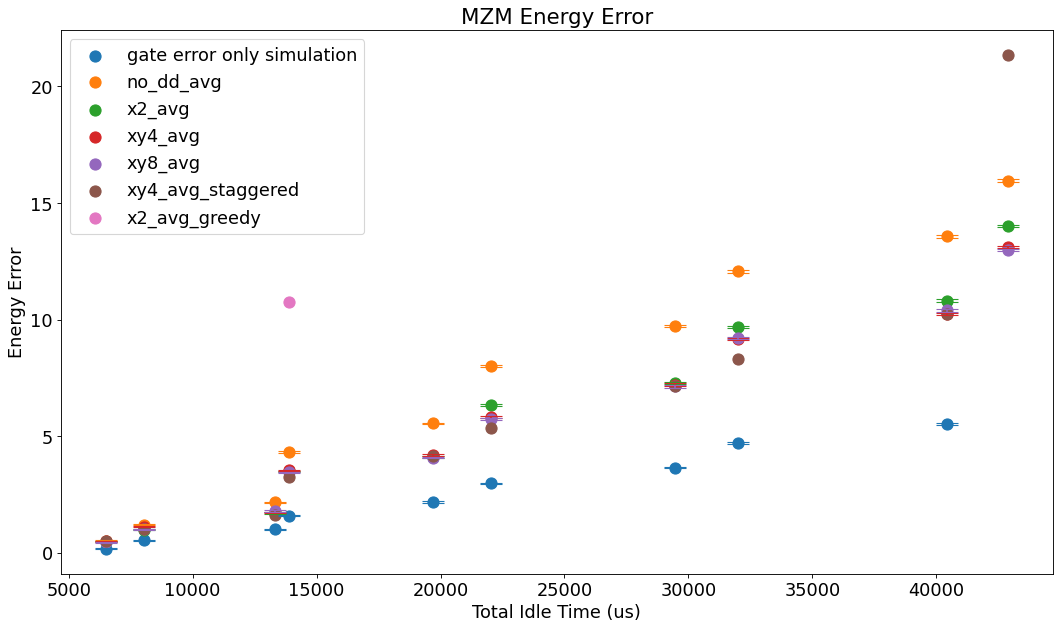

In [1645]:
plt.figure(figsize=(16, 9), dpi=80)
plt.rc('font', size=16)
# plt.scatter(n_modes, error_reduction_X2[0])
# plt.scatter(n_modes, error_reduction_XY4[0])
# plt.scatter(n_modes, error_reduction_XY8[0])
# plt.scatter(n_modes, error_reduction_XY8[1])
# plt.scatter(n_modes, error_reduction_XY8[2])
# plt.scatter(n_modes, error_reduction_XY8[3])
# plt.scatter(n_modes, error_reduction_XY8[4])
# for i in [1, 2, 3, 4]:
#     plt.scatter(times_non_staggered * 2.2e4, error_reduction_XY8_non_staggered[i], label=f'μ={params[0].chemical_potential_values[i]}', s=100)
    # plt.scatter(times_error * 2.2e4, error_noise[i], label=f'μ={params[0].chemical_potential_values[i]}, noise', s=100)
    # plt.scatter(times_non_staggered * 2.2e4, bare_non_staggered[i])
# plt.plot(keys, exp_fit(keys, *popt1) * 100)
plt.scatter(times_error * 2.2e4, error_noise[-1], label='gate error only simulation', s=100)
plt.errorbar(times_error * 2.2e4, error_noise[-1], 2 * stddev_noise[-1], ls='none', capsize=10)

# plt.scatter(times_error_idle * 2.2e4, error_noise_idle[-1], label='gate + decoherence error simulation', s=100)
# plt.scatter(times * 2.2e4, x2_avg_non_staggered, label='average_error_x2', s=100)
# plt.scatter(times * 2.2e4, xy4_avg_non_staggered, label='average_error_xy4', s=100)
# plt.scatter(times * 2.2e4, xy8_avg_non_staggered, label='average_error_xy8', s=100)

plt.scatter(times_non_staggered * 2.2e4, bare_non_staggered[-1], label='no_dd_avg', s=100)
# plt.errorbar(times_non_staggered * 2.2e4, bare_non_staggered_avg,  2 * bare_avg_stddev_non_staggered, ls='none', capsize=10)

# plt.scatter([param.n_modes for param in params_staggered], x2_avg, label='average_error_x2')

plt.scatter(times_non_staggered * 2.2e4, error_reduction_X2_non_staggered[-1], label='x2_avg', s=100)
plt.scatter(times_non_staggered * 2.2e4, error_reduction_XY4_non_staggered[-1], label='xy4_avg', s=100)
plt.scatter(times_non_staggered * 2.2e4, error_reduction_XY8_non_staggered[-1], label='xy8_avg', s=100)
plt.errorbar(times_non_staggered * 2.2e4, bare_non_staggered[-1], 2 * stddev_bare[-1], ls='none', capsize=10)
plt.errorbar(times_non_staggered * 2.2e4, error_reduction_X2_non_staggered[-1], 2 * stddev_x2_non_staggered[-1],ls='none', capsize=10)
plt.errorbar(times_non_staggered * 2.2e4, error_reduction_XY4_non_staggered[-1], 2 * stddev_xy4_non_staggered[-1], ls='none', capsize=10)
plt.errorbar(times_non_staggered * 2.2e4, error_reduction_XY8_non_staggered[-1], 2 * stddev_xy8_non_staggered[-1], ls='none', capsize=10)

plt.scatter(times * 2.2e4, error_reduction_XY4[-1], label='xy4_avg_staggered', s=100)

plt.scatter(times_greedy * 2.2e4, error_reduction_X2_greedy[-1], label='x2_avg_greedy', s=100)

# plt.scatter([param.n_modes for param in params_noise], noise_avg, label='noise')
# popt_noise, pcov_noise = curve_fit(exp_fit, times_error, noise_avg)
# plt.plot(times_error * 2.2e4, exp_fit(times_error, *popt_noise), label='noise_fit')
# i=3
# plt.scatter(times, bare[i], label='bare')
# plt.scatter(times, error_reduction_X2[i], label='X2')
# plt.scatter(times, error_reduction_XY4[i], label='XY4')
# plt.scatter(times, error_reduction_XY4[i], label='XY8')
# plt.legend()
# plt.title(f'{params[0].chemical_potential_values[i]}')


popt, pcov = curve_fit(exp_fit, np.asarray(times), x2_avg)
# plt.plot(sorted_times * 2.2e4, exp_fit(sorted_times, *popt), label='average_fit')
# plt.plot(keys * 2.2e4, vals * noise_avg[-1] / vals[-2], label='scaled_cx*')
plt.legend()
plt.title('MZM Energy Error')
plt.xlabel('Total Idle Time (us)')
plt.ylabel('Energy Error')

In [341]:
np.asarray(times).sort()
times

array([0.29555232, 0.36547776, 0.60632032, 0.63100288, 0.8945552 ,
       1.00155456, 1.33951968, 1.4542464 , 1.8382864 , 1.94917312])

In [648]:
cx_counts = {
    3: 538,
    4: 1008,
    5: 2238,
    6: 3220,
    7: 5634,
    8: 7336,
    9: 11334,
    10: 13932,
    11: 19882,
    12: 23584
}

cx_counts_0 = {
    3: 546,
    4: 972,
    5: 2202,
    6 : 3142,
    7 : 5546,
    8 : 7156,
    9 : 11154,
    10 : 13644,
    11 : 19602,
    12 : 23164
}

In [784]:
keys = [delay_times[key] * 1e-8 for key in cx_counts.keys()]
vals = [val for val in cx_counts.values()]
vals = np.asarray(vals)
vals = vals * xy8_avg.max() / vals[-2]

In [785]:
keys = np.sort(np.asarray(keys))
vals = np.sort(vals) 

[1.81372217 0.82055604 1.64254461]
[0.02771598 0.70664412 0.03295522]


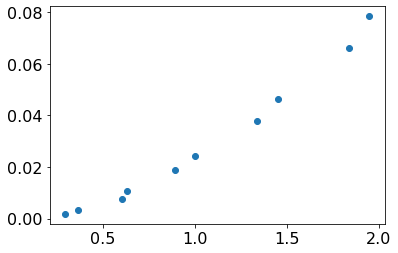

In [793]:
plt.scatter(np.sort(np.asarray(keys)), np.sort(vals))
popt1, pcov1 = curve_fit(exp_fit, keys, vals)
print(popt)
print(popt1)

[0.00700069 0.21615915 0.0131377 ]


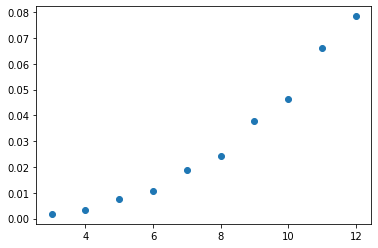

In [672]:
plt.scatter(range(3, 13), vals)
popt2, pcov2 = curve_fit(exp_fit, range(3, 13), vals)
print(popt2)

## Make plots

In [11]:
# load data from local disk

filenames = [
    "2022-06-06T14:36:55.135537_ibmq_guadalupe_n9",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""
data = []
data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [12]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Analysis callback failed [Experiment ID: 6f8d4ab8-c64e-4ef1-b603-aaed1ddc7158][Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/database_service/db_experiment_data.py", line 535, in _run_analysis_callback
    callback(self, **kwargs)
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/base_analysis.py", line 157, in run_analysis
    results, figures = analysis._run_analysis(expdata)
  File "/Users

CPU times: user 10min 31s, sys: 16.2 s, total: 10min 47s
Wall time: 6min 3s


In [13]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Uhrig_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

DbExperimentEntryNotFound: 'Analysis result fidelity_witness_avg not found.\nErrors: \n[Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]: Analysis callback failed [Experiment ID: 6f8d4ab8-c64e-4ef1-b603-aaed1ddc7158][Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]:\nTraceback (most recent call last):\n  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/database_service/db_experiment_data.py", line 535, in _run_analysis_callback\n    callback(self, **kwargs)\n  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/base_analysis.py", line 157, in run_analysis\n    results, figures = analysis._run_analysis(expdata)\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/analysis.py", line 113, in _run_analysis\n    results = list(self._compute_analysis_results(experiment_params, data, mit))\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/analysis.py", line 274, in _compute_analysis_results\n    ] = compute_correlation_matrix(quasis_raw)\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py", line 477, in compute_correlation_matrix\n    tunneling_plus, tunneling_plus_cov = compute_interaction_matrix(\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py", line 568, in compute_interaction_matrix\n    even_quasis = quasis[permutation, f"{label}_even"]\nKeyError: ((3, 5, 1, 7, 0, 8, 2, 6, 4), \'tunneling_plus_even\')\n'

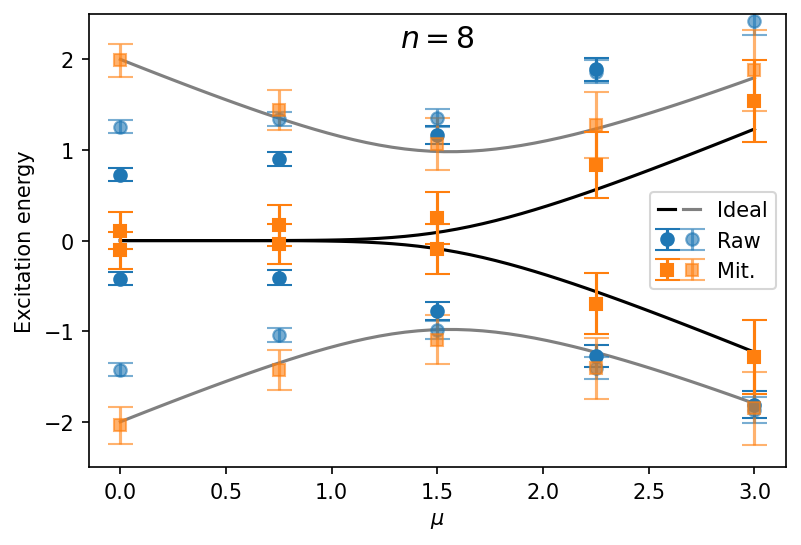

In [69]:
# plot BdG energies
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

ideal_lines = []
for i, energies in enumerate(bdg_energy_exact[0]):
    color = "gray" if i % 2 else "black"
    ideal_lines.append(
        ax.plot(
            bdg_energy_exact[1], energies, color=color, label=None if i else "Ideal"
        )
    )

threshold = len(bdg_energy[dd_sequence]["raw"][0]) // 2
raw_values, raw_stddev = bdg_energy[dd_sequence]["raw"]
mit_values, mit_stddev = bdg_energy[dd_sequence]["pur"]

raw_lines = []
mit_lines = []
for i in range(threshold):
    alpha = 1.0 if i == 0 else 0.6
    raw1 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[i],
        yerr=2 * raw_stddev[i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
        label=None if i else "Raw",
    )
    raw2 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[threshold + i],
        yerr=2 * raw_stddev[threshold + i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
    )
    mit1 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[i],
        yerr=2 * mit_stddev[i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
        label=None if i else "Mit.",
    )
    mit2 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[threshold + i],
        yerr=2 * mit_stddev[threshold + i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
    )
    raw_lines.append(raw1)
    raw_lines.append(raw2)
    mit_lines.append(mit1)
    mit_lines.append(mit2)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"Excitation energy")
ax.set_ylim(-2.5, 2.5)

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

(p1,) = ideal_lines[0]
(p2,) = ideal_lines[1]
q1 = raw_lines[0]
q2 = raw_lines[2]
r1 = mit_lines[0]
r2 = mit_lines[2]
ax.legend(
    [(p1, p2), (q1, q2), (r1, r2)],
    ["Ideal", "Raw", "Mit."],
    numpoints=1,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
# ax.legend(loc="center right")

ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)

data.add_figures(fig, "bdg_energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/bdg_energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")

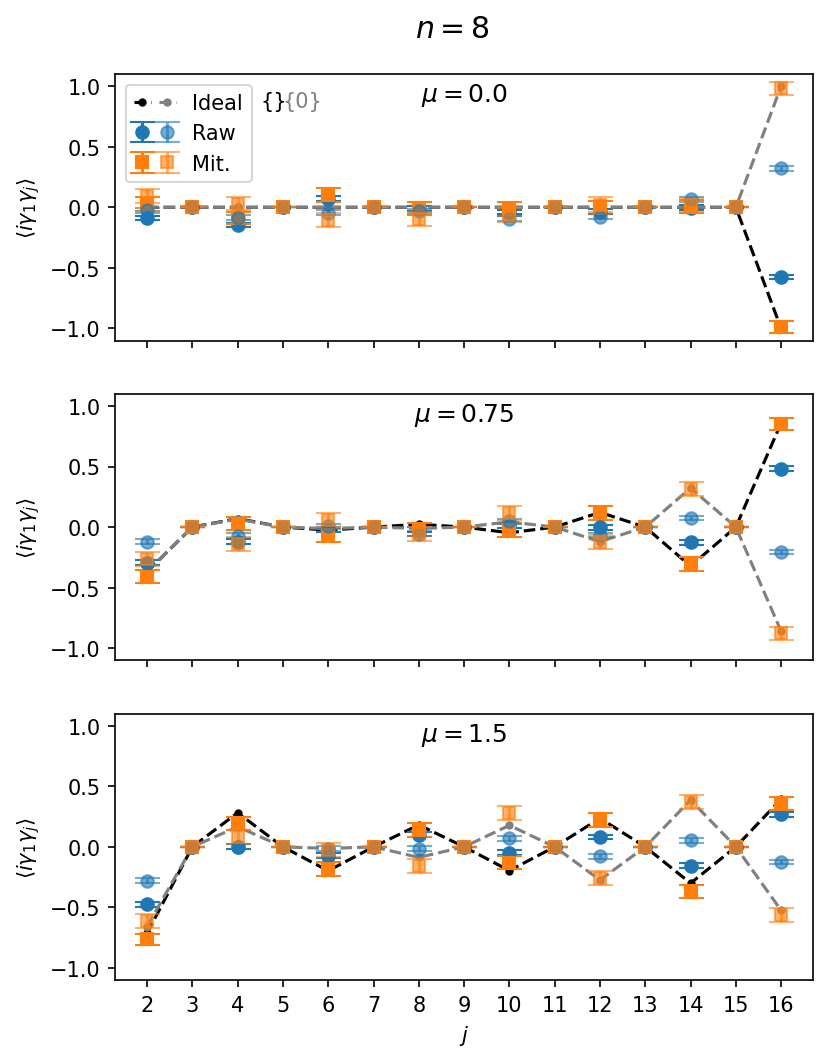

In [70]:
### plot site correlation
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

xvals = range(2, 2 * params.n_modes + 1)

chemical_potentials_to_plot = params.chemical_potential_values[:3]
# chemical_potentials_to_plot = params.chemical_potential_values
occupied_orbitals_to_plot = params.occupied_orbitals_list[0:3:2]
# occupied_orbitals_to_plot = params.occupied_orbitals_list[2:4]

fig, axes = plt.subplots(len(chemical_potentials_to_plot), 1, dpi=dpi, figsize=(6, 8))
# fig.subplots_adjust(hspace=0.7)

ideal_lines = []
raw_lines = []
mit_lines = []
for index, (ax, chemical_potential) in enumerate(
    zip(axes, chemical_potentials_to_plot)
):
    for i, occupied_orbitals in enumerate(occupied_orbitals_to_plot):
        alpha = 1.0 if i == 0 else 0.6
        # this_parity = int(parity_exact[occupied_orbitals][0][index])
        ideal_color = "black" if i == 0 else "gray"
        ideal_text = str(list(occupied_orbitals)).replace("[", "{").replace("]", "}")
        if index == 0:
            ax.text(4.5 + i * 0.5, 0.83, ideal_text, color=ideal_color)
        site_correlations = site_correlation_exact[
            chemical_potential, occupied_orbitals
        ]
        ideal_lines.append(
            ax.plot(
                xvals,
                site_correlations,
                ".--",
                color=ideal_color,
                label="Ideal" if not occupied_orbitals else None,
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["raw"][
            chemical_potential, occupied_orbitals
        ]
        raw_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="o",
                capsize=capsize,
                color=colors[0],
                alpha=alpha,
                label=None if i else "Raw",
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["pur"][
            chemical_potential, occupied_orbitals
        ]
        mit_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="s",
                capsize=capsize,
                color=colors[1],
                alpha=alpha,
                label=None if i else "Mit.",
            )
        )
        ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel(r"$\langle i \gamma_1 \gamma_j \rangle$")
    ax.set_xticks(xvals)
    if index == 0:
        from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

        (p1,) = ideal_lines[0]
        (p2,) = ideal_lines[1]
        q1 = raw_lines[0]
        q2 = raw_lines[1]
        r1 = mit_lines[0]
        r2 = mit_lines[1]
        ax.legend(
            [(p1, p2), (q1, q2), (r1, r2)],
            ["Ideal", "Raw", "Mit."],
            numpoints=1,
            handler_map={tuple: HandlerTuple(ndivide=None)},
            loc="upper left",
        )
        # ax.legend(loc='lower left')
    if index == len(axes) - 1:
        ax.set_xlabel(r"$j$")
    else:
        ax.tick_params(axis="x", labelbottom=False)

    ax.set_title(rf"$\mu={chemical_potential}$", y=0.85)

fig.suptitle(rf"$n = {params.n_modes}$", size="x-large", y=0.93)
data.add_figures(fig, f"site_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/site_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()

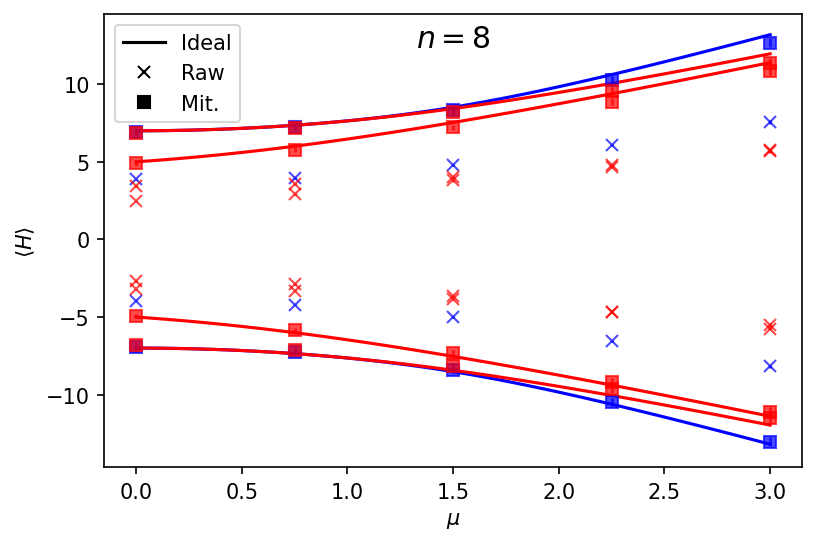

In [71]:
# plot energy
fig, ax = plt.subplots(dpi=dpi)

for occupied_orbitals, (energies, xvals) in energy_exact.items():
    ax.plot(
        xvals,
        energies,
        # label = "Ideal" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="x",
        # label="Raw" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="s",
        # label = "Mit." if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
ax.plot([], [], label="Ideal", color="black")
ax.errorbar([], [], fmt="x", label="Raw", color="black")
ax.errorbar([], [], fmt="s", label="Mit.", color="black")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle H \rangle$")
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)
ax.legend()

data.add_figures(fig, "energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

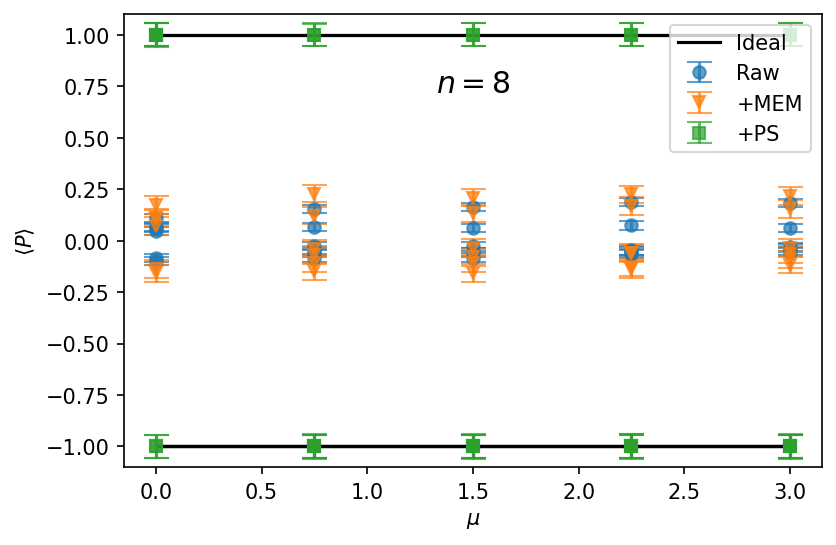

In [72]:
# plot parity
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (parities, xvals) in parity_exact.items():
    ax.plot(
        xvals, parities, label="Ideal" if not occupied_orbitals else None, color="black"
    )

for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["raw"].items():
    label = "Raw" if not occupied_orbitals else None
    color = "red" if len(occupied_orbitals) % 2 else "blue"
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["mem"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="v",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="+MEM" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["ps"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[2],
        alpha=0.7,
        label="+PS" if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle P \rangle$")
ax.set_ylim(-1.1, 1.1)
ax.legend()
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.80)

data.add_figures(fig, "parity", overwrite=True)
plt.savefig(f"{PLOT_DIR}/parity_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

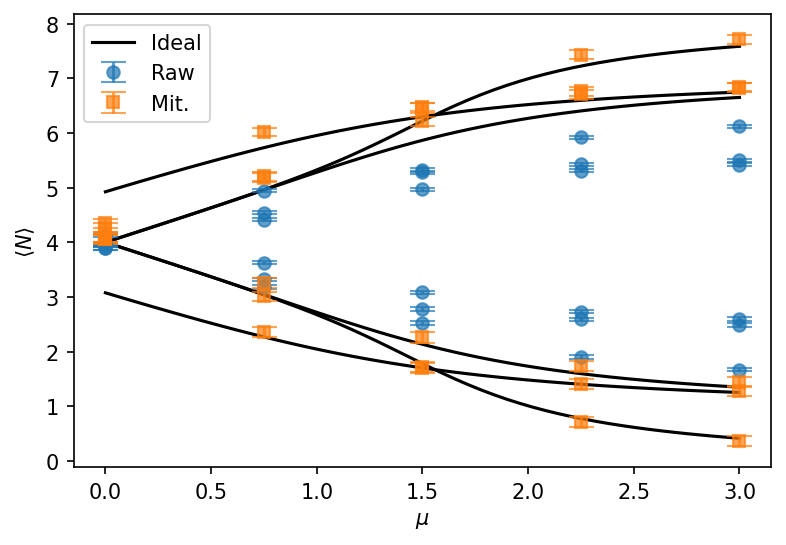

In [73]:
# plot number
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (numbers, xvals) in number_exact.items():
    ax.plot(
        xvals,
        numbers,
        label="Ideal" if not occupied_orbitals else None,
        color="black",
    )

for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle N \rangle$")
ax.legend()

data.add_figures(fig, "number", overwrite=True)
plt.savefig(f"{PLOT_DIR}/number_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

AttributeError: 'list' object has no attribute 'items'

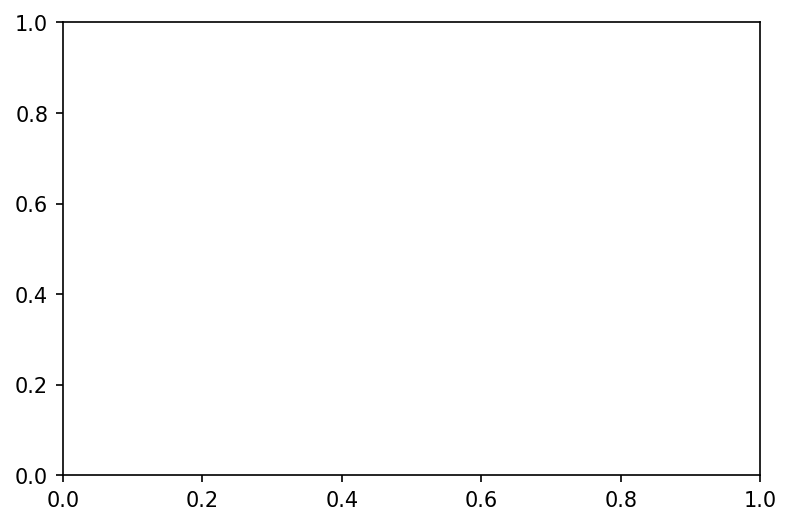

In [49]:
# plot edge correlation
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (values, xvals) in edge_correlation_exact.items():
    ax.plot(
        xvals,
        values,
        color="black",
        label="Ideal" if not occupied_orbitals else None,
    )

for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "raw"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "pur"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle -i \gamma_1 \gamma_6 \rangle$")
ax.axhline([0], color="gray", linestyle="--")
ax.legend(loc="center left")
ax.set_title(rf"$n = {params.n_modes}$")

data.add_figures(fig, "edge_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/edge_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()